# Machine Learning Project

## Problem Description:

#### *A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:*
#### Which variables are significant in predicting the price of a car
#### How well those variables describe the price of a car
#### Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

### Business Goal:

#### *You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.*

### **1. Loading and Preprocessing**

In [2]:
# Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn model selection and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
df = pd.read_csv('C:/Users/yaase/OneDrive/Documents/CarPrice_Assignment.csv')  #loading data
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

1. **Converting door number and cylinder number int o int**

In [10]:
# Standardizing string format in 'doornumber' and 'cylindernumber' columns
df['doornumber'] = df['doornumber'].astype(str).str.lower().str.strip()
df['cylindernumber'] = df['cylindernumber'].astype(str).str.lower().str.strip()

In [11]:
# Display unique values in 'doornumber' and 'cylindernumber' columns
print("Unique values in 'doornumber':", df['doornumber'].unique())
print("Unique values in 'cylindernumber':", df['cylindernumber'].unique())

Unique values in 'doornumber': ['two' 'four']
Unique values in 'cylindernumber': ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [12]:
# Mapping word numbers to numeric values
word_to_num = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

# Applying mapping to relevant columns
df['doornumber'] = df['doornumber'].map(word_to_num)
df['cylindernumber'] = df['cylindernumber'].map(word_to_num)

In [13]:
# Display data types of 'doornumber' and 'cylindernumber' columns
print(df[['doornumber', 'cylindernumber']].dtypes)

doornumber        int64
cylindernumber    int64
dtype: object


In [14]:
# Display rows where 'doornumber' is missing
print("Rows with missing 'doornumber':")
print(df[df['doornumber'].isna()])

# Display rows where 'cylindernumber' is missing
print("\nRows with missing 'cylindernumber':")
print(df[df['cylindernumber'].isna()])


Rows with missing 'doornumber':
Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]

Rows with missing 'cylindernumber':
Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]


2. **Data cleaning**

In [16]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
df['CarName'].head(10)

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
5                    audi fox
6                  audi 100ls
7                   audi 5000
8                   audi 4000
9         audi 5000s (diesel)
Name: CarName, dtype: object

In [18]:
# Display sorted unique car names
unique_car_names = sorted(df['CarName'].unique())
print("Sorted unique car names:")
print(unique_car_names)

Sorted unique car names:
['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia', 'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4', 'buick century', 'buick century luxus (sw)', 'buick century special', 'buick electra 225 custom', 'buick opel isuzu deluxe', 'buick regal sport coupe (turbo)', 'buick skyhawk', 'buick skylark', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge challenger se', 'dodge colt (sw)', 'dodge colt hardtop', 'dodge coronet custom', 'dodge coronet custom (sw)', 'dodge d200', 'dodge dart custom', 'dodge monaco (sw)', 'dodge rampage', 'honda accord', 'honda accord cvcc', 'honda accord lx', 'honda civic', 'honda civic (auto)', 'honda civic 1300', 'honda civic 1500 gl', 'honda civic cvcc', 'honda prelude', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'isuzu MU-X', 'jaguar xf', 'jaguar xj', 'jaguar xk', 'maxda glc delux

3. **Splitting the car name to get clear brand name to avoid complexity**.

In [19]:
# Extract the car brand (first word of 'CarName') and convert to lowercase
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Display the new 'CarBrand' column
print(df['CarBrand'])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarBrand, Length: 205, dtype: object


In [20]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


4. **Correcting spelling error for brand names**

In [22]:
# Correct common typos in 'CarBrand' column
df['CarBrand'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}, inplace=True)

In [23]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [24]:
# Print sorted unique car brands
print(sorted(df['CarBrand'].unique()))

['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']


5. **Deleting car name as it was replaed with car barnd name**

In [25]:
# Drop the 'CarName' column
df.drop('CarName', axis=1, inplace=True)

In [26]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [27]:
# Define target variable
target = 'price'  # Target variable is 'price'

# Identify numerical columns excluding the target
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

6. **Detecting outliners in numerical columns**.

In [28]:
def count_outliers_iqr(df, num_cols):
    outlier_counts = {}
    total_outliers = 0

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
        outlier_counts[col] = count
        total_outliers += count
        
    return outlier_counts, total_outliers

# Usage
outliers_before, total_before = count_outliers_iqr(df, num_cols)

print("Outliers BEFORE removal:")
print(outliers_before)
print(f"Total outliers: {total_before}")

Outliers BEFORE removal:
{'car_ID': 0, 'symboling': 0, 'doornumber': 0, 'wheelbase': 3, 'carlength': 1, 'carwidth': 8, 'carheight': 0, 'curbweight': 0, 'cylindernumber': 46, 'enginesize': 10, 'boreratio': 0, 'stroke': 20, 'compressionratio': 28, 'horsepower': 6, 'peakrpm': 2, 'citympg': 2, 'highwaympg': 3}
Total outliers: 129


7. **Outliner removal**

In [29]:
def remove_outliers_iqr(df, num_cols):
 
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Remove outliers
df_cleaned = remove_outliers_iqr(df, num_cols)

# Count outliers after removal
outliers_after, total_after = count_outliers_iqr(df_cleaned, num_cols)

print("\nOutliers AFTER removal:")
print(outliers_after)
print(f"Total outliers: {total_after}")



Outliers AFTER removal:
{'car_ID': 0, 'symboling': 0, 'doornumber': 0, 'wheelbase': 13, 'carlength': 2, 'carwidth': 6, 'carheight': 2, 'curbweight': 0, 'cylindernumber': 0, 'enginesize': 0, 'boreratio': 0, 'stroke': 0, 'compressionratio': 2, 'horsepower': 1, 'peakrpm': 0, 'citympg': 0, 'highwaympg': 0}
Total outliers: 26


In [30]:
df_cleaned

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
10,11,2,gas,std,2,sedan,rwd,front,101.2,176.8,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0,bmw
11,12,0,gas,std,4,sedan,rwd,front,101.2,176.8,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16925.0,bmw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,-1,gas,std,4,wagon,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0,volvo
196,197,-2,gas,std,4,sedan,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0,volvo
197,198,-1,gas,std,4,wagon,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0,volvo
200,201,-1,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo


In [31]:
print(df_cleaned['cylindernumber'].dtype)

int64


In [32]:
print(df_cleaned['cylindernumber'].isna().sum())

0


In [33]:
print(df_cleaned['cylindernumber'].unique())

[4]


In [34]:
print(df_cleaned['cylindernumber'].head(10))

0     4
1     4
3     4
10    4
11    4
19    4
20    4
21    4
22    4
24    4
Name: cylindernumber, dtype: int64


In [35]:
# Print number of unique values in 'cylindernumber'
print(df_cleaned['cylindernumber'].nunique())

# Print counts of each unique value in 'cylindernumber'
print(df_cleaned['cylindernumber'].value_counts())


1
cylindernumber
4    118
Name: count, dtype: int64


In [40]:
print(df_cleaned)

     car_ID  symboling fueltype aspiration  doornumber      carbody  \
0         1          3      gas        std           2  convertible   
1         2          3      gas        std           2  convertible   
3         4          2      gas        std           4        sedan   
10       11          2      gas        std           2        sedan   
11       12          0      gas        std           4        sedan   
..      ...        ...      ...        ...         ...          ...   
195     196         -1      gas        std           4        wagon   
196     197         -2      gas        std           4        sedan   
197     198         -1      gas        std           4        wagon   
200     201         -1      gas        std           4        sedan   
204     205         -1      gas      turbo           4        sedan   

    drivewheel enginelocation  wheelbase  carlength  ...  fuelsystem  \
0          rwd          front       88.6      168.8  ...        mpfi   
1  

In [41]:
# Calculate Q1, Q3, and IQR for 'price'
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers in 'price'
df_final = df_cleaned[(df_cleaned['price'] >= lower_bound) & (df_cleaned['price'] <= upper_bound)]

# Print the shape of DataFrame before and after removing outliers
print("Shape before removing price outliers:", df_cleaned.shape)
print("Shape after removing price outliers:", df_final.shape)


Shape before removing price outliers: (118, 25)
Shape after removing price outliers: (113, 25)


In [42]:
df_final

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
10,11,2,gas,std,2,sedan,rwd,front,101.2,176.8,...,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0,bmw
19,20,1,gas,std,2,hatchback,fwd,front,94.5,155.9,...,2bbl,3.03,3.11,9.6,70,5400,38,43,6295.0,chevrolet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,-2,gas,std,4,sedan,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0,volvo
195,196,-1,gas,std,4,wagon,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0,volvo
196,197,-2,gas,std,4,sedan,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0,volvo
197,198,-1,gas,std,4,wagon,rwd,front,104.3,188.8,...,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0,volvo


In [43]:
target = 'price'

# Numerical columns excluding the target variable
num_cols = df_final.select_dtypes(include=['int64', 'float64']).columns.drop(target)
print("Numerical columns (excluding target):")
print(num_cols)

# Categorical columns
cat_cols = df_final.select_dtypes(include='object').columns
print("\nCategorical columns:")
print(cat_cols)


Numerical columns (excluding target):
Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg'],
      dtype='object')

Categorical columns:
Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'CarBrand'],
      dtype='object')


8. **Correlation of numerical columns woth price for feature selection.**

horsepower          0.807159
curbweight          0.802753
carlength           0.739298
citympg             0.729594
highwaympg          0.725784
enginesize          0.689365
carwidth            0.678980
boreratio           0.654702
wheelbase           0.599735
carheight           0.271491
car_ID              0.224270
doornumber          0.186480
compressionratio    0.162408
symboling           0.119805
stroke              0.031628
peakrpm             0.007106
dtype: float64


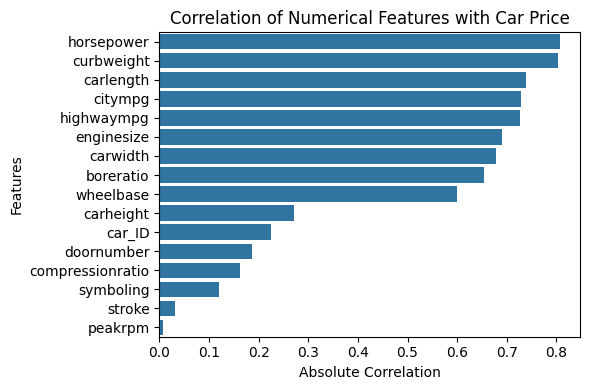

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate absolute correlations of numerical features with the target
correlations = df_final[num_cols].corrwith(df_final[target]).abs().sort_values(ascending=False)

# Print correlations
print(correlations)

# Plot correlation values as a horizontal bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlation of Numerical Features with Car Price')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [45]:
selected_features = correlations[correlations > 0.5].index.tolist()

print("Most highly correlated features (correlation > 0.5):")
print(selected_features)


Most highly correlated features (correlation > 0.5):
['horsepower', 'curbweight', 'carlength', 'citympg', 'highwaympg', 'enginesize', 'carwidth', 'boreratio', 'wheelbase']


9. **Correlation using heatmap**

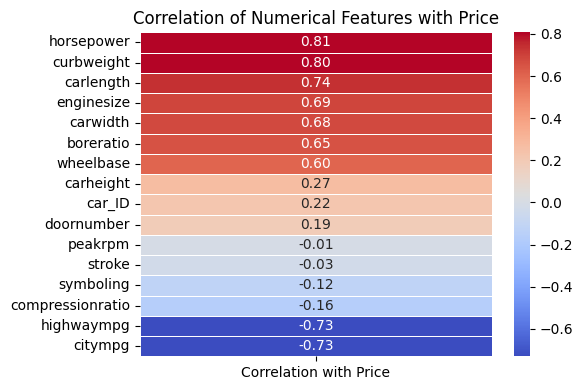


Highly correlated numerical features with price (>|0.5|):
['horsepower', 'curbweight', 'carlength', 'enginesize', 'carwidth', 'boreratio', 'wheelbase', 'highwaympg', 'citympg']


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations of numerical features with target 'price'
correlations = df_final[num_cols].corrwith(df_final[target])

# Create a DataFrame for better visualization
corr_df = correlations.to_frame(name='Correlation with Price').sort_values(by='Correlation with Price', ascending=False)

# Plot heatmap of correlations
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation of Numerical Features with Price")
plt.tight_layout()
plt.show()

# Set correlation threshold
threshold = 0.5

# Select features with absolute correlation greater than threshold
high_corr_features = correlations[correlations.abs() > threshold].sort_values(ascending=False)
selected_features = high_corr_features.index.tolist()

print("\nHighly correlated numerical features with price (>|0.5|):")
print(selected_features)


In [47]:
print(cat_cols)

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'CarBrand'],
      dtype='object')


10. **Encoding catagorical columns for doing feature selction.**

In [48]:
import pandas as pd

# List of categorical columns to encode
cat_cols = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
            'enginetype', 'fuelsystem', 'CarBrand']

# One-hot encode categorical columns, dropping the first category to avoid dummy variable trap
df_encoded = pd.get_dummies(df_final, columns=cat_cols, drop_first=True)

# Print the shape and columns of the encoded DataFrame
print(df_encoded.shape)
print(df_encoded.columns)


(113, 47)
Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'fuelsystem_2bbl', 'fuelsystem_mpfi', 'fuelsystem_spfi',
       'CarBrand_audi', 'CarBrand_bmw', 'CarBrand_chevrolet', 'CarBrand_dodge',
       'CarBrand_honda', 'CarBrand_isuzu', 'CarBrand_mazda',
       'CarBrand_mitsubishi', 'CarBrand_nissan', 'CarBrand_peugeot',
       'CarBrand_plymouth', 'CarBrand_renault', 'CarBrand_saab',
       'CarBrand_subaru', 'CarBrand_toyota', 'CarBrand_volkswagen',
       'CarBrand_volvo'],
      dtype='object')


In [49]:
df_encoded

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,CarBrand_mitsubishi,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,False,False,False
1,2,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,False,False,False
3,4,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,False,False,False,False
10,11,2,2,101.2,176.8,64.8,54.3,2395,108,3.50,...,False,False,False,False,False,False,False,False,False,False
19,20,1,2,94.5,155.9,63.6,52.0,1874,90,3.03,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,-2,4,104.3,188.8,67.2,56.2,2912,141,3.78,...,False,False,False,False,False,False,False,False,False,True
195,196,-1,4,104.3,188.8,67.2,57.5,3034,141,3.78,...,False,False,False,False,False,False,False,False,False,True
196,197,-2,4,104.3,188.8,67.2,56.2,2935,141,3.78,...,False,False,False,False,False,False,False,False,False,True
197,198,-1,4,104.3,188.8,67.2,57.5,3042,141,3.78,...,False,False,False,False,False,False,False,False,False,True


In [50]:
import pandas as pd

# Set pandas option to display all columns when printing DataFrames
pd.set_option('display.max_columns', None)

# Print the first 5 rows of the encoded DataFrame
print(df_encoded.head())

    car_ID  symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0        1          3           2       88.6      168.8      64.1       48.8   
1        2          3           2       88.6      168.8      64.1       48.8   
3        4          2           4       99.8      176.6      66.2       54.3   
10      11          2           2      101.2      176.8      64.8       54.3   
19      20          1           2       94.5      155.9      63.6       52.0   

    curbweight  enginesize  boreratio  stroke  compressionratio  horsepower  \
0         2548         130       3.47    2.68               9.0         111   
1         2548         130       3.47    2.68               9.0         111   
3         2337         109       3.19    3.40              10.0         102   
10        2395         108       3.50    2.80               8.8         101   
19        1874          90       3.03    3.11               9.6          70   

    peakrpm  citympg  highwaympg    price  a

11. **Correlation between catagoricl columns and price.**

In [51]:
# List of original categorical columns
cat_cols = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
            'enginetype', 'fuelsystem', 'CarBrand']

# Find encoded columns related to the categorical features
cat_encoded_cols = [col for col in df_encoded.columns if any(cat in col for cat in cat_cols)]

# Compute correlation of encoded categorical features with 'price' and sort descending
cat_corr_with_price = df_encoded[cat_encoded_cols].corrwith(df_encoded['price']).sort_values(ascending=False)

# Print the correlations
print(cat_corr_with_price)


fuelsystem_mpfi        0.734500
drivewheel_rwd         0.562762
CarBrand_volvo         0.474651
enginetype_l           0.275498
CarBrand_peugeot       0.275498
CarBrand_bmw           0.252635
CarBrand_saab          0.246760
CarBrand_audi          0.167681
carbody_sedan          0.138441
aspiration_turbo       0.117834
carbody_wagon          0.102895
CarBrand_volkswagen    0.068402
fuelsystem_spfi        0.068270
CarBrand_renault       0.026275
carbody_hardtop        0.022844
CarBrand_isuzu        -0.009623
enginetype_ohcf       -0.024121
CarBrand_subaru       -0.024121
CarBrand_toyota       -0.079001
CarBrand_honda        -0.091000
CarBrand_mazda        -0.101107
CarBrand_chevrolet    -0.127500
CarBrand_plymouth     -0.159945
CarBrand_nissan       -0.172267
CarBrand_mitsubishi   -0.177510
CarBrand_dodge        -0.185007
enginetype_ohc        -0.215897
carbody_hatchback     -0.325997
drivewheel_fwd        -0.511894
fuelsystem_2bbl       -0.623002
dtype: float64


In [52]:
threshold = 0.1  
important_features = cat_corr_with_price[abs(cat_corr_with_price) >= threshold].index.tolist()

print("Most important features based on correlation threshold:")
print(important_features)


Most important features based on correlation threshold:
['fuelsystem_mpfi', 'drivewheel_rwd', 'CarBrand_volvo', 'enginetype_l', 'CarBrand_peugeot', 'CarBrand_bmw', 'CarBrand_saab', 'CarBrand_audi', 'carbody_sedan', 'aspiration_turbo', 'carbody_wagon', 'CarBrand_mazda', 'CarBrand_chevrolet', 'CarBrand_plymouth', 'CarBrand_nissan', 'CarBrand_mitsubishi', 'CarBrand_dodge', 'enginetype_ohc', 'carbody_hatchback', 'drivewheel_fwd', 'fuelsystem_2bbl']


In [53]:
df_encoded

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,fuelsystem_2bbl,fuelsystem_mpfi,fuelsystem_spfi,CarBrand_audi,CarBrand_bmw,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_mazda,CarBrand_mitsubishi,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,11,2,2,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430.0,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19,20,1,2,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70,5400,38,43,6295.0,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,-2,4,104.3,188.8,67.2,56.2,2912,141,3.78,3.15,9.5,114,5400,23,28,12940.0,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
195,196,-1,4,104.3,188.8,67.2,57.5,3034,141,3.78,3.15,9.5,114,5400,23,28,13415.0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
196,197,-2,4,104.3,188.8,67.2,56.2,2935,141,3.78,3.15,9.5,114,5400,24,28,15985.0,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
197,198,-1,4,104.3,188.8,67.2,57.5,3042,141,3.78,3.15,9.5,114,5400,24,28,16515.0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


12. **Final data frame with numerical column and encoded catagorical columns.**

In [54]:
final_important_features = selected_features + important_features
final_important_features_with_target = final_important_features + ['price']

df_impt = df_encoded[final_important_features_with_target]

print("Final DataFrame shape:", df_impt.shape)
print("Final features for training (including target):")
print(df_impt.columns.tolist())


Final DataFrame shape: (113, 31)
Final features for training (including target):
['horsepower', 'curbweight', 'carlength', 'enginesize', 'carwidth', 'boreratio', 'wheelbase', 'highwaympg', 'citympg', 'fuelsystem_mpfi', 'drivewheel_rwd', 'CarBrand_volvo', 'enginetype_l', 'CarBrand_peugeot', 'CarBrand_bmw', 'CarBrand_saab', 'CarBrand_audi', 'carbody_sedan', 'aspiration_turbo', 'carbody_wagon', 'CarBrand_mazda', 'CarBrand_chevrolet', 'CarBrand_plymouth', 'CarBrand_nissan', 'CarBrand_mitsubishi', 'CarBrand_dodge', 'enginetype_ohc', 'carbody_hatchback', 'drivewheel_fwd', 'fuelsystem_2bbl', 'price']


In [55]:
df_impt

,horsepower,curbweight,carlength,enginesize,carwidth,boreratio,wheelbase,highwaympg,citympg,fuelsystem_mpfi,drivewheel_rwd,CarBrand_volvo,enginetype_l,CarBrand_peugeot,CarBrand_bmw,CarBrand_saab,CarBrand_audi,carbody_sedan,aspiration_turbo,carbody_wagon,CarBrand_mazda,CarBrand_chevrolet,CarBrand_plymouth,CarBrand_nissan,CarBrand_mitsubishi,CarBrand_dodge,enginetype_ohc,carbody_hatchback,drivewheel_fwd,fuelsystem_2bbl,price
0,111,2548,168.8,130,64.1,3.47,88.6,27,21,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,13495.0
1,111,2548,168.8,130,64.1,3.47,88.6,27,21,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16500.0
3,102,2337,176.6,109,66.2,3.19,99.8,30,24,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,13950.0
10,101,2395,176.8,108,64.8,3.50,101.2,29,23,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,16430.0
19,70,1874,155.9,90,63.6,3.03,94.5,43,38,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True,6295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,114,2912,188.8,141,67.2,3.78,104.3,28,23,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,12940.0
195,114,3034,188.8,141,67.2,3.78,104.3,28,23,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,13415.0
196,114,2935,188.8,141,67.2,3.78,104.3,28,24,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,15985.0
197,114,3042,188.8,141,67.2,3.78,104.3,28,24,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,16515.0


In [56]:
X = df_impt.drop('price', axis=1)
print(X)

y = df_impt['price']
print(y)


     horsepower  curbweight  carlength  enginesize  carwidth  boreratio  \
0           111        2548      168.8         130      64.1       3.47   
1           111        2548      168.8         130      64.1       3.47   
3           102        2337      176.6         109      66.2       3.19   
10          101        2395      176.8         108      64.8       3.50   
19           70        1874      155.9          90      63.6       3.03   
..          ...         ...        ...         ...       ...        ...   
194         114        2912      188.8         141      67.2       3.78   
195         114        3034      188.8         141      67.2       3.78   
196         114        2935      188.8         141      67.2       3.78   
197         114        3042      188.8         141      67.2       3.78   
200         114        2952      188.8         141      68.9       3.78   

     wheelbase  highwaympg  citympg  fuelsystem_mpfi  drivewheel_rwd  \
0         88.6          27 

## Training and Testing

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


## **Model Implementation**

***Linear Regression***

In [60]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
LR = LinearRegression()

# Fit the model on training data
LR.fit(X_train, y_train)

# Predict on test data
y_pred_LR = LR.predict(X_test)


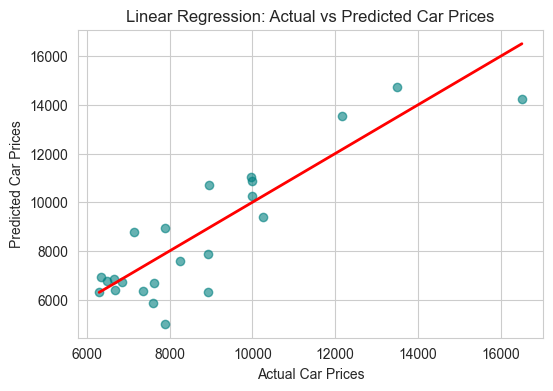

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred_LR, color='teal', alpha=0.6)

# Plot the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Linear Regression: Actual vs Predicted Car Prices")
plt.show()


***Decision Tree Regressor***

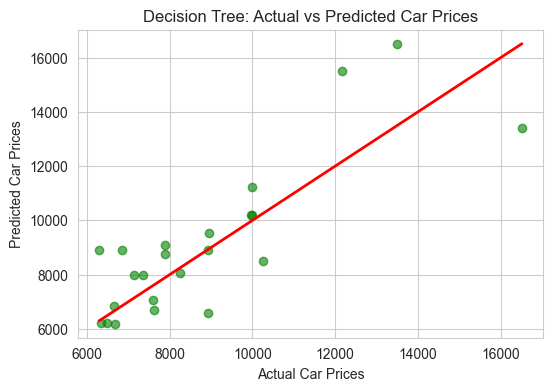

In [62]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Decision Tree Regressor
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train, y_train)

# Predict on test data
y_pred_DT = DT.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_DT, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line

plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Decision Tree: Actual vs Predicted Car Prices")
plt.show()


***Random Forest Regressor***

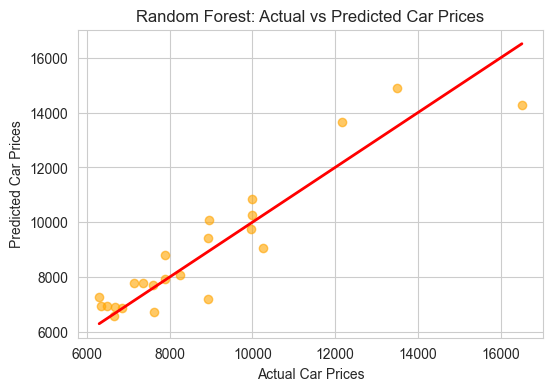

In [63]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Random Forest Regressor
RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# Predict on test data
y_pred_RF = RF.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_RF, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line

plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Random Forest: Actual vs Predicted Car Prices")
plt.show()


***Gradient Boosting Regressor***

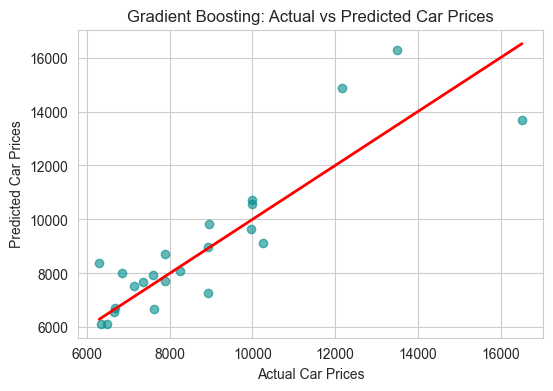

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Gradient Boosting Regressor
GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GB.fit(X_train, y_train)

# Predict on test data
y_pred_GB = GB.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_GB, color='darkcyan', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line

plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Gradient Boosting: Actual vs Predicted Car Prices")
plt.show()


***Support Vector Regressor***

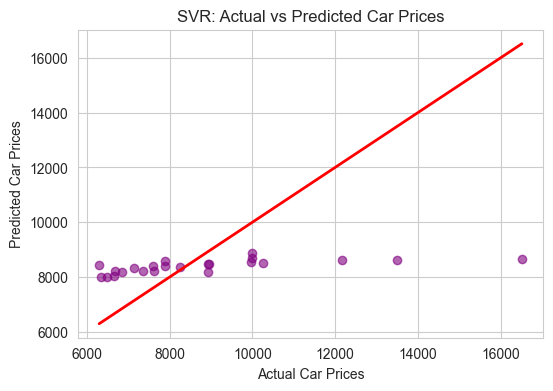

In [66]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SVR model with specified hyperparameters
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Fit model on scaled training data
svr.fit(X_train_scaled, y_train)

# Predict on scaled test data
y_pred_svr = svr.predict(X_test_scaled)

# Plot actual vs predicted prices
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_svr, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line

plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("SVR: Actual vs Predicted Car Prices")
plt.show()


## **Model Evaluation**

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd

def evaluate_model(y_test, y_pred):
    return {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

results = {
    'Linear Regression': evaluate_model(y_test, y_pred_LR),
    'Decision Tree': evaluate_model(y_test, y_pred_DT),
    'Random Forest': evaluate_model(y_test, y_pred_RF),
    'Gradient Boosting': evaluate_model(y_test, y_pred_GB),
    'SVR': evaluate_model(y_test, y_pred_svr)
}

# Display results as a DataFrame, transposed for readability
pd.DataFrame(results).T


,R2 Score,MSE,MAE
Linear Regression,0.710023,1.759815e+06,1080.029084
Decision Tree,0.595705,2.453584e+06,1166.021739
Random Forest,0.858812,8.568406e+05,717.664565
Gradient Boosting,0.737638,1.592225e+06,903.332833
SVR,0.094164,5.497339e+06,1647.477929


In [68]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create baseline predictions by filling with the mean of y_test
baseline_mean = np.full_like(y_test, fill_value=y_test.mean())


In [69]:
print("Baseline (Mean) Evaluation:")
print("MAE:", mean_absolute_error(y_test, baseline_mean))
print("MSE:", mean_squared_error(y_test, baseline_mean))
print("R2 Score:", r2_score(y_test, baseline_mean))


Baseline (Mean) Evaluation:
MAE: 1848.3497164461246
MSE: 6068801.20510397
R2 Score: 0.0


### ***Model Evaluation Summary***

***All models except SVR outperformed the baseline.***

**Best Model: Random Forest**

**Achieved the highest R² score (0.859), explaining 86% of the variance in car prices.**

**Recorded the lowest MAE and MSE, indicating superior prediction accuracy.**

## **Feature Importance Analysis**

                Feature  Importance
0            horsepower    0.495802
7            highwaympg    0.127229
1            curbweight    0.116387
2             carlength    0.056634
6             wheelbase    0.046202
8               citympg    0.031217
9       fuelsystem_mpfi    0.030505
4              carwidth    0.025092
5             boreratio    0.012533
3            enginesize    0.012144
17        carbody_sedan    0.008963
27    carbody_hatchback    0.008891
10       drivewheel_rwd    0.006275
19        carbody_wagon    0.005298
16        CarBrand_audi    0.005128
14         CarBrand_bmw    0.003769
11       CarBrand_volvo    0.001848
24  CarBrand_mitsubishi    0.001194
26       enginetype_ohc    0.000993
28       drivewheel_fwd    0.000942
29      fuelsystem_2bbl    0.000666
15        CarBrand_saab    0.000455
18     aspiration_turbo    0.000428
12         enginetype_l    0.000390
23      CarBrand_nissan    0.000362
25       CarBrand_dodge    0.000195
20       CarBrand_mazda    0

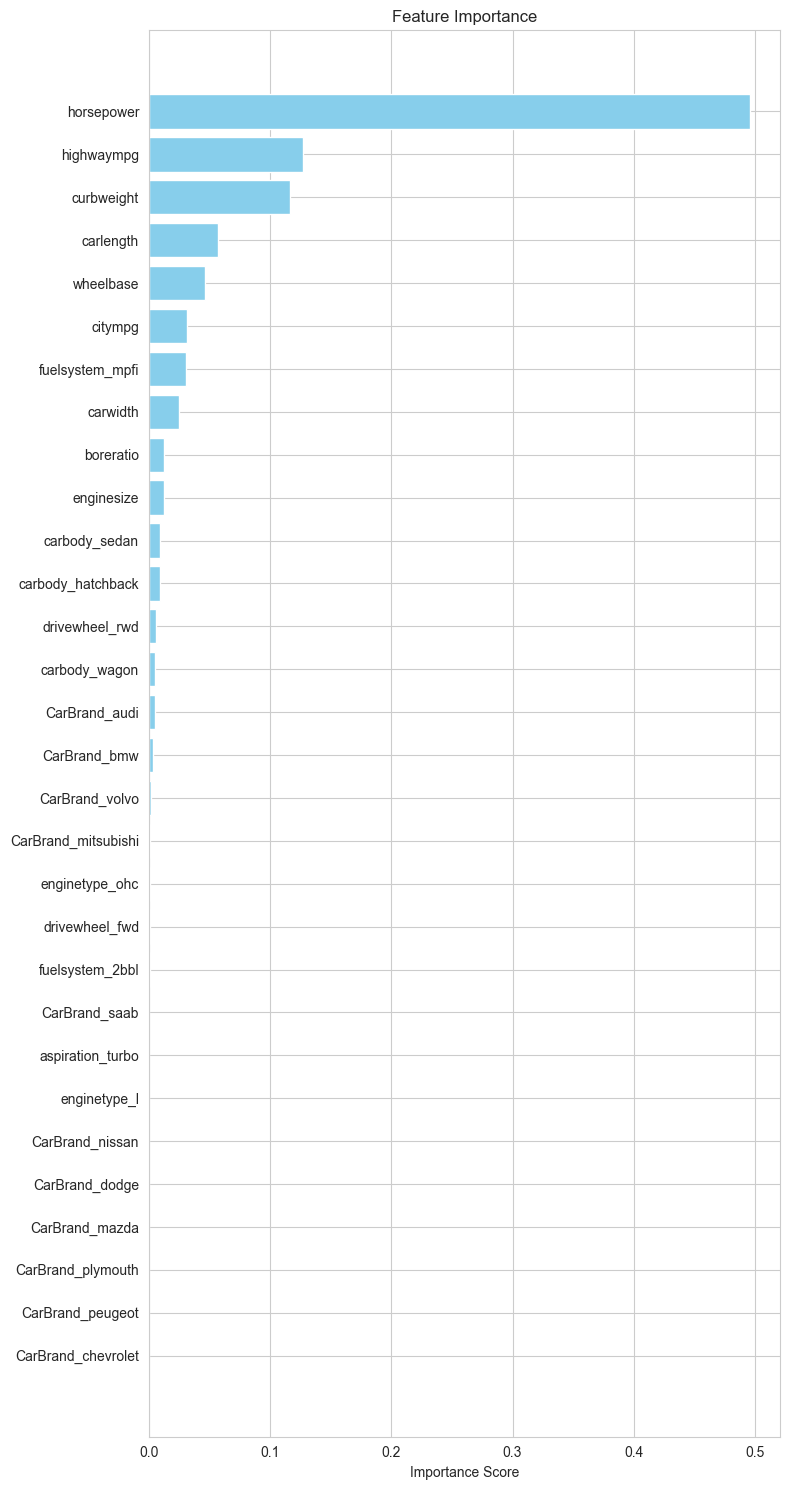

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
importances = RF.feature_importances_
features = X_train.columns

# Create and sort DataFrame of feature importances
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feat_importance)

# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(8, 15))
plt.barh(feat_importance['Feature'], feat_importance['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()


 ## ***Feature Importance Analysis***

**Feature importance was evaluated using the Random Forest Regressor.**

##### *The model identified the most influential features for predicting car prices as follows:*

***Horsepower — Importance Score: 0.496***

***Highway MPG — Importance Score: 0.127***

***Curb Weight — Importance Score: 0.116***

***Car Length — Importance Score: 0.057***

***Wheelbase — Importance Score: 0.046***

## **Hyper parameter tuning**

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]             # Minimum number of samples required to be at a leaf node
}


In [77]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor with a random state for reproducibility
rf = RandomForestRegressor(random_state=42)


In [78]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [79]:
# Get the best model after GridSearchCV
best_rf = grid_search.best_estimator_

# Print the best hyperparameters found
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


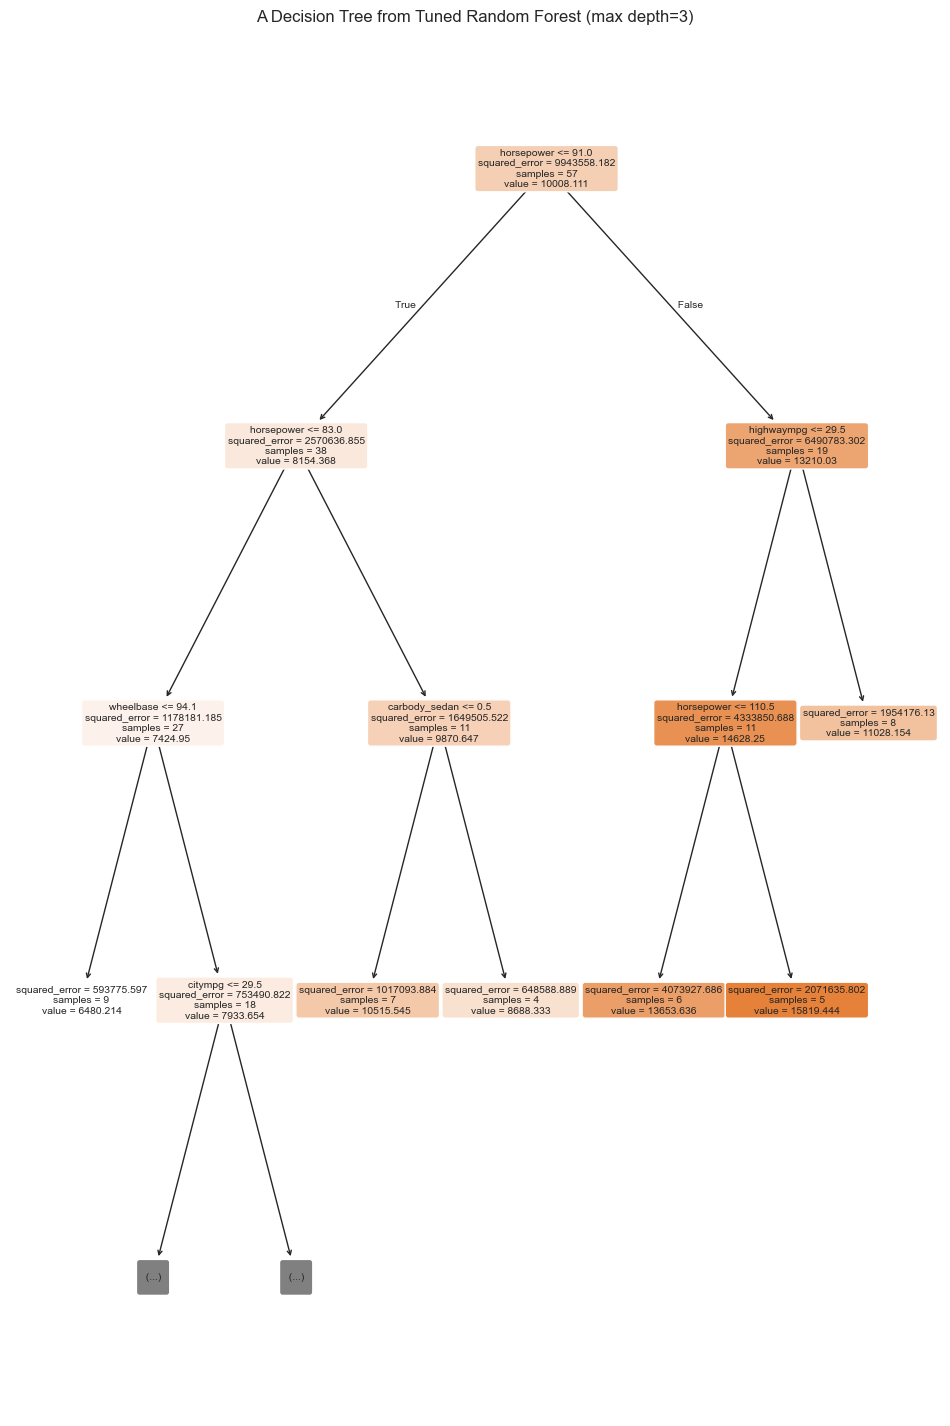

In [84]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 18))

# Plot the first decision tree in the Random Forest
plot_tree(
    best_rf.estimators_[0],              # Access the first tree
    feature_names=X_train.columns,       # Use column names for features
    filled=True,                         # Fill nodes with color
    rounded=True,                        # Round node boxes
    max_depth=3                          # Limit tree depth for readability
)

plt.title("A Decision Tree from Tuned Random Forest (max depth=3)")
plt.show()


**Prediction with the New Tuned Model**

In [85]:
y_pred_best = best_rf.predict(X_test)

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("After Tuning:")
print("R² Score:", r2_score(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))


After Tuning:
R² Score: 0.8719047850783183
MSE: 777384.3946847542
MAE: 675.4829106884258


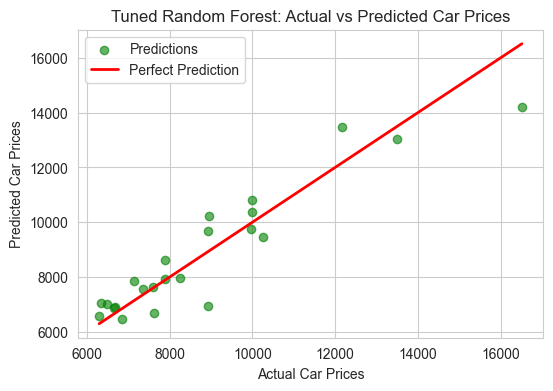

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_best = best_rf.predict(X_test)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_best, color='green', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Tuned Random Forest: Actual vs Predicted Car Prices")
plt.legend()
plt.show()


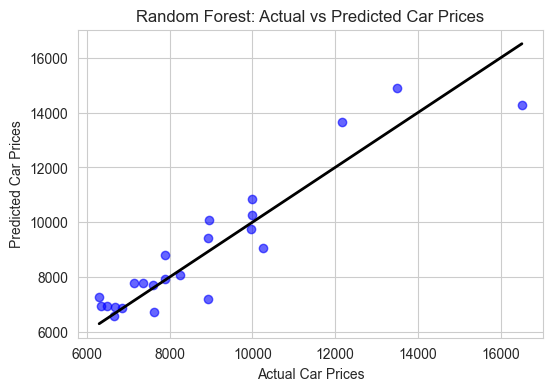

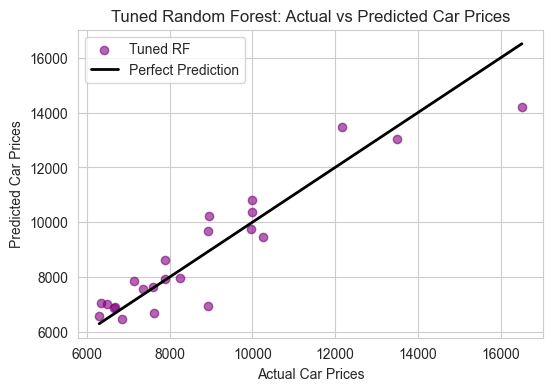

In [88]:
RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_RF, color='blue', alpha=0.6, label='Original RF')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2)  # Perfect prediction line
plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Random Forest: Actual vs Predicted Car Prices")

y_pred_best = best_rf.predict(X_test)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

plt.scatter(y_test, y_pred_best, color='purple', alpha=0.6, label='Tuned RF')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, label='Perfect Prediction')

plt.xlabel("Actual Car Prices")
plt.ylabel("Predicted Car Prices")
plt.title("Tuned Random Forest: Actual vs Predicted Car Prices")
plt.legend()
plt.show()


**Performance evaluation of Random Forest after parameter tuning**

| Metric    | Before Tuning | After Tuning | Note            |
|-----------|---------------|--------------|-----------------|
| R2 Score  | 0.858812      | 0.871905     | Higher is better|
| MSE       | 856,840.6     | 777,384.4    | Lower is better |
| MAE       | 717.66        | 675.48       | Lower is better |
